# E-commerce Customer Churn Analysis and Prediction

## Data Quality Report

**Data Dictionary**
The data set belongs to a leading online E-Commerce company. An online retail (E-commerce) company wants to know the customers who are going to churn, so accordingly they can approach customer to offer some promos.

$CustomerID$: Unique customer ID<br/>
$Churn$: Churn Flag. 1 means customer leave and 0 means customer uses the service<br/>
$Tenure$: Tenure of customer in organization<br/>
$PreferredLoginDevice$: Preferred login device of customer like laptop or phone<br/>
$CityTier$: City tier(1,2,3)<br/>
$WarehouseToHome$: Distance in between warehouse to home of customer<br/>
$PreferredPaymentMode$: Preferred payment method of customer<br/>
$Gender$: Gender of customer<br/>
$HourSpendOnApp$: Number of hours spend on mobile application or website<br/>
$NumberOfDeviceRegistered$: Total number of deceives is registered on particular customer<br/>
$PreferedOrderCat$: Preferred order category of customer in last month<br/>
$SatisfactionScore$: Satisfactory score of customer on service<br/>
$MaritalStatus$: Marital status of customer<br/>
$NumberOfAddress$: Total number of added added on particular customer<br/>
$Complain$: Any complaint has been raised in last month<br/>
$OrderAmountHikeFromlastYear$: Percentage increases in order from last year<br/>
$CouponUsed$: Total number of coupon has been used in last month<br/>
$OrderCount$: Total number of orders has been places in last month<br/>
$DaySinceLastOrder$: Day Since last order by customer<br/>
$CashbackAmount$: Average cashback in last month<br/>

Data Reference:[Kaggle Dataset](https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)

**Import Library**

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display, Markdown, Latex, clear_output

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report,accuracy_score, roc_curve, auc

import warnings
warnings.filterwarnings("ignore")

**Data Loading**

In [2]:
data = pd.read_csv("Cleaned_ECommerce.csv")
data.head()

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,4.0,Mobile Phone,3.0,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2.0,Single,9.0,1.0,11.0,1.0,1.0,5.0,159.93
1,1.0,9.0,Mobile Phone,1.0,8.0,UPI,Male,3.0,4.0,Mobile Phone,3.0,Single,7.0,1.0,15.0,0.0,1.0,0.0,120.90
2,1.0,9.0,Mobile Phone,1.0,30.0,Debit Card,Male,2.0,4.0,Mobile Phone,3.0,Single,6.0,1.0,14.0,0.0,1.0,3.0,120.28
3,1.0,0.0,Mobile Phone,3.0,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,5.0,Single,8.0,0.0,23.0,0.0,1.0,3.0,134.07
4,1.0,0.0,Mobile Phone,1.0,12.0,Credit Card,Male,3.0,3.0,Mobile Phone,5.0,Single,3.0,0.0,11.0,1.0,1.0,3.0,129.60


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   float64
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   float64
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   float64
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   float64
 13  Complain          

In [4]:
data.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,0.168384,10.134103,1.654707,15.566785,2.934636,3.688988,3.066785,4.214032,0.284902,15.674600,1.716874,2.961812,4.459325,177.223030
std,0.374240,8.357951,0.915389,8.345961,0.705528,1.023999,1.380194,2.583586,0.451408,3.591058,1.857640,2.879248,3.570626,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,15.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


**Identify numeric and categorical variables**

In [5]:
Numeric = data.select_dtypes("number").copy()
Categorical = data.select_dtypes("object").copy()
print("Numeric Variables: ",Numeric.columns,"\n","Categorical Variables: ",Categorical.columns)

Numeric Variables:  Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object') 
 Categorical Variables:  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


## EDA

## Model Building

**Data Processing and Partitioning**

**Scaling the numerical features**<br/>

Different features have different magnitude. Fitting our model without normalizing could give us misleading feature importance.

In [6]:
# Using MinMaxScaler to scale values all between 0 and 1 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[Numeric.columns])
data[Numeric.columns] = scaler.transform(data[Numeric.columns])

In [7]:
data[Numeric.columns]

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1.0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.000000,0.108696,0.492107
1,1.0,0.147541,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.000000,0.000000,0.372011
2,1.0,0.147541,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.000000,0.065217,0.370104
3,1.0,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.000000,0.065217,0.412536
4,1.0,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.000000,0.065217,0.398782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,0.163934,0.0,0.204918,0.6,0.2,0.00,0.238095,0.0,0.466667,0.0625,0.066667,0.086957,0.463737
5626,0.0,0.213115,0.0,0.065574,0.6,0.8,1.00,0.238095,0.0,0.333333,0.0625,0.066667,0.065217,0.692052
5627,0.0,0.016393,0.0,0.049180,0.6,0.2,0.75,0.095238,1.0,0.666667,0.0625,0.066667,0.086957,0.573618
5628,0.0,0.377049,1.0,0.032787,0.8,0.8,0.75,0.142857,0.0,0.266667,0.1250,0.066667,0.195652,0.550478


**Encoding the categorical feature**<br/>

We will use One-Hot Encoding in this case.

In [8]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse = False)
encoder.fit(data[Categorical.columns])
encoded_cols = list(encoder.get_feature_names_out(Categorical.columns))
print(encoded_cols)
data[encoded_cols] = encoder.transform(data[Categorical.columns])

['PreferredLoginDevice_Computer', 'PreferredLoginDevice_Mobile Phone', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']


**Splitting the training set and test set**

In [9]:
X = data[list(Numeric.columns) + encoded_cols].copy()
X.drop('Churn', axis =1, inplace = True)
y = data.Churn.copy()

X.head()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.065574,1.0,0.008197,0.6,0.4,0.25,0.380952,1.0,0.000000,0.0625,0.0,0.108696,0.492107,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.147541,0.0,0.024590,0.6,0.6,0.50,0.285714,1.0,0.266667,0.0000,0.0,0.000000,0.372011,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.147541,0.0,0.204918,0.4,0.6,0.50,0.238095,1.0,0.200000,0.0000,0.0,0.065217,0.370104,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.000000,1.0,0.081967,0.4,0.6,1.00,0.333333,0.0,0.800000,0.0000,0.0,0.065217,0.412536,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.0,0.057377,0.6,0.4,1.00,0.095238,0.0,0.000000,0.0625,0.0,0.065217,0.398782,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

### 1. Fitting Baseline on Imbalanced Data

In [11]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
print("The training accuracy score is ",accuracy_score(y_train, LR.predict(X_train)))
print("The test accuracy score is ",accuracy_score(y_test, LR.predict(X_test)))

The training accuracy score is  0.8911443795990865
The test accuracy score is  0.8845470692717584


Our basline model has been doing quite well in terms of the accuracy score.<br/> 

However, this high accuracy score somehow could be misleading. Since we have a super imbalanced data, the high accuracy score may only suggest that our model is good at predicting the most common label.

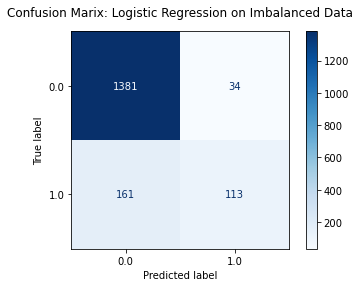

In [12]:
plot_confusion_matrix(LR, X_test, y_test, display_labels= LR.classes_, cmap= "Blues", normalize= None)
plt.title("Confusion Marix: Logistic Regression on Imbalanced Data",fontsize = 12, pad=15)
plt.show()

In [13]:
# Look at other metrics
print(classification_report(y_test, LR.predict(X_test), digits=3))

              precision    recall  f1-score   support

         0.0      0.896     0.976     0.934      1415
         1.0      0.769     0.412     0.537       274

    accuracy                          0.885      1689
   macro avg      0.832     0.694     0.735      1689
weighted avg      0.875     0.885     0.870      1689



For the minority label 1, we could see that the presision rate is not that high, while the recall rate is even worse, pretty low as only 41.2%. This suggests our baseline has a really bad performance in finding those who would leave.<br/>

In the following, we would try to solve the problem by dealing with imbalanced data and use more models to compare.

### 2. Data Augmentation

To deal with the problem of imbalanced data, traditional ways would be:<br>
1) Oversampling from the minority class.<br/>
2) Undersamping from the majority class.<br/>
3) Using **SMOTE** to create synthesized data.<br/>

Here we choose 3) to build up our training set.

In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 2)
X_train_ow, y_train_ow = smote.fit_resample(X_train, y_train)

Text(0.5, 0, 'Churn Flag')

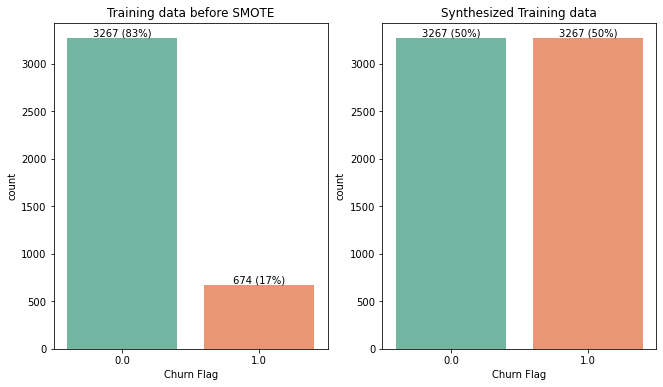

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10.8,6))

# Left Plot
ax[0].set_title('Training data before SMOTE')
sns.countplot(x=y_train,order=y_train.value_counts(ascending=False).index, palette = 'Set2',ax = ax[0])

abs_values = y_train.value_counts(ascending=False)
rel_values = y_train.value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax[0].bar_label(container=ax[0].containers[0], labels=lbls)
ax[0].set_xlabel("Churn Flag")

# Right Plot
ax[1].set_title('Synthesized Training data')
sns.countplot(x=y_train_ow,order=y_train_ow.value_counts(ascending=False).index, palette = 'Set2',ax = ax[1])

abs_values_ = y_train_ow.value_counts(ascending=False)
rel_values_ = y_train_ow.value_counts(ascending=False, normalize=True).values * 100
lbls_ = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values_, rel_values_)]

ax[1].bar_label(container=ax[1].containers[0], labels=lbls_)
ax[1].set_xlabel("Churn Flag")

The synthesized training data has balanced labels.

### 3. Fitting on Synthesized Data

## Conclusion